# Aprendizaje NO Supervisado

# Clustering

In [2]:
import seaborn as sns
from sklearn import preprocessing
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', lambda x: '%.2f' % x)

df = pd.read_csv("../data/2008_small.zip",nrows=100000)
df = df.sample(frac = 1)

### Tipos distintos de clustering
https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68 

# K-Means
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Kmeans maximiza la varianza intergrupal, y minimiza la varianza intragrupal

In [3]:
newdf = df[["AirTime","DepDelay"]].dropna()
# newdf = df[["AirTime","Distance","TaxiOut","TaxiIn","ArrDelay","DepDelay"]].dropna()

In [4]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(newdf)

kmeans

KMeans(n_clusters=4, random_state=0)

In [5]:
kmeans.labels_

array([1, 2, 1, ..., 3, 1, 2])

In [6]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3])

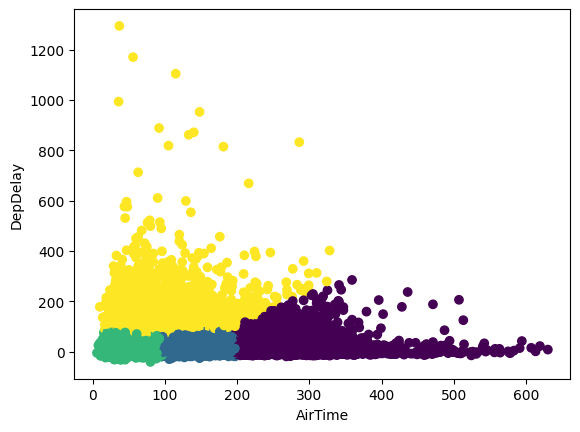

In [9]:
plt.scatter(newdf["AirTime"],newdf["DepDelay"],c = kmeans.labels_)
plt.xlabel("AirTime")
plt.ylabel("DepDelay") 
plt.show()

In [ ]:
newdf

In [ ]:
sns.scatterplot(x="AirTime",y="DepDelay",data=newdf, hue=kmeans.labels_)

>Podemos obtener información sobre los centros de cada uno de los clusters

In [ ]:
# ! pip install --upgrade scipy --user
import scipy
scipy.__version__

In [ ]:
from scipy.stats  import itemfreq

itemfreq(kmeans.labels_)

In [10]:
kmeans.cluster_centers_

array([[261.56779307,   8.49155194],
       [134.68215159,   4.34824556],
       [ 60.06087508,   3.34751389],
       [ 92.37907138, 134.28389928]])

>Y hasta predicciones usando **datos nuevos**

In [11]:
alldf = pd.read_csv("../data/2008_small.zip",nrows=1000000)[["AirTime","DepDelay"]].dropna()

In [12]:
kmeans.predict(alldf) # "clasificar" nuevos puntos usando lo aprendido con los primeros 100.000 casos

array([2, 0, 2, ..., 1, 2, 1])

In [ ]:
itemfreq(kmeans.predict(alldf))

>Ahora vamos a hacer el proceso con los datos reescalados, hasta añadiendo más columnas de las que podemos visualizar

In [13]:
df = df[["AirTime","DepDelay","ArrDelay","Distance"]].dropna()
X_scaled = preprocessing.scale(df)

kmeans = KMeans(n_clusters=7, random_state=0).fit(X_scaled)

X_scaled # (x - media) / sd

array([[ 1.13320539e-01,  2.55999709e-01,  4.62454778e-01,
        -3.58423279e-01],
       [-8.33354862e-01, -2.81885495e-01, -2.62684042e-01,
        -8.57733544e-01],
       [ 7.64159878e-01, -4.80053728e-01, -6.77049082e-01,
         6.49050271e-01],
       ...,
       [-4.93143390e-01,  4.98372756e+00,  4.55430955e+00,
        -5.65583921e-01],
       [ 3.64781193e-01,  2.27689961e-01, -3.70589177e-03,
         6.36656045e-01],
       [-2.41682736e-01,  9.92053146e-01, -2.96037068e-02,
        -1.17621165e-01]])

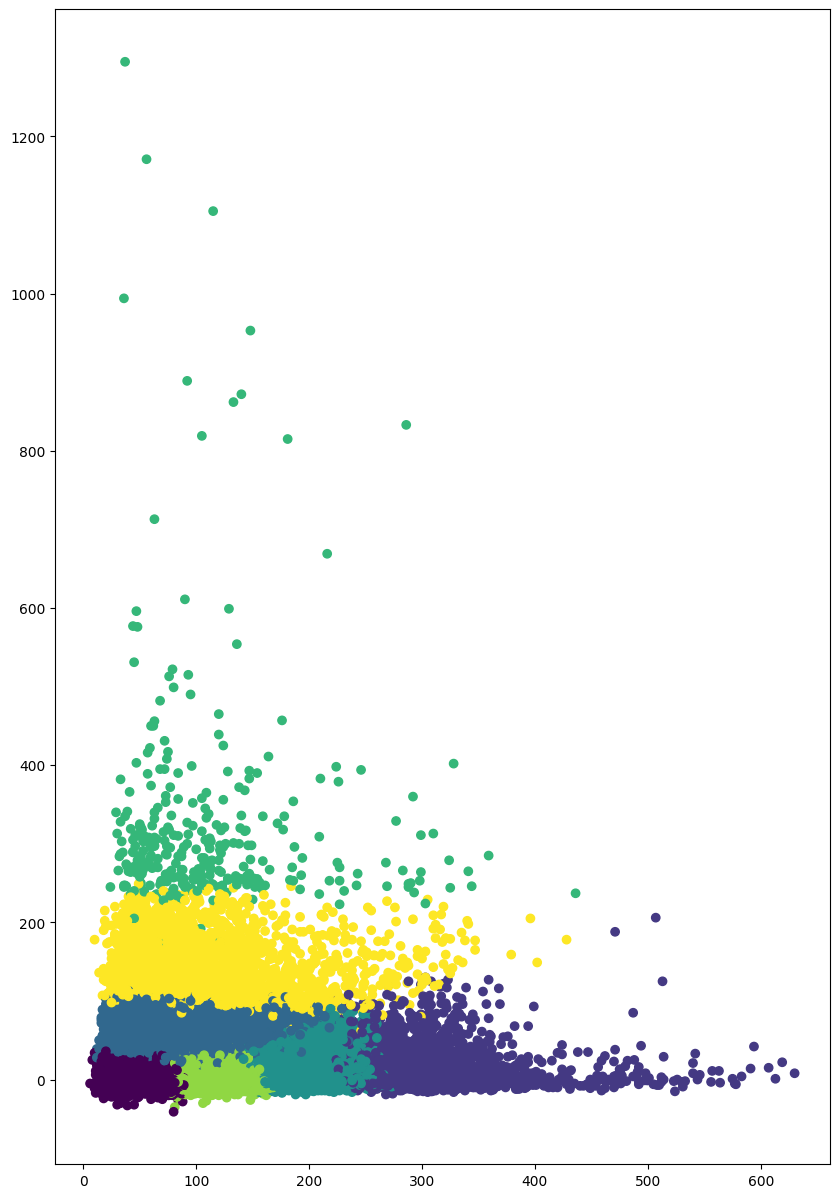

In [14]:
plt.figure(figsize=(10,15))
plt.scatter(df["AirTime"],df["DepDelay"],c = kmeans.labels_)
plt.show()

> `Y = (X - media) / desviacion`\
> `X = Y * desviacion + media`

In [15]:
pd.DataFrame(kmeans.cluster_centers_, columns = df.columns)

,AirTime,DepDelay,ArrDelay,Distance
0,-0.73,-0.29,-0.28,-0.72
1,2.87,-0.10,-0.11,2.91
2,-0.28,1.18,1.24,-0.30
3,1.32,-0.16,-0.16,1.32
4,0.14,9.00,8.42,0.10
5,0.17,-0.28,-0.29,0.16
6,0.03,3.64,3.51,-0.00


In [16]:
pd.DataFrame( kmeans.cluster_centers_ * np.array(df.std()) + np.array(df.mean()), columns = df.columns)

,AirTime,DepDelay,ArrDelay,Distance
0,54.94,-0.36,-2.80,325.53
1,298.46,6.35,3.90,2375.90
2,85.43,51.54,55.93,560.17
3,193.31,4.30,1.84,1476.15
4,114.02,328.04,333.32,788.32
5,115.93,0.18,-2.90,819.84
6,106.50,138.59,143.72,729.18


# Hierarchical Cluster
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
- Affinity
- Linkage

In [17]:
df = pd.read_csv("../data/2008_small.zip",nrows=5000)
newdf = df[["AirTime","Distance","TaxiOut","ArrDelay","DepDelay"]].dropna()

In [18]:
clstr = cluster.AgglomerativeClustering(n_clusters=5)
clstr.fit(newdf)
clstr.labels_

array([1, 4, 3, ..., 2, 1, 3], dtype=int64)

In [19]:
np.unique(clstr.labels_)

array([0, 1, 2, 3, 4], dtype=int64)

In [20]:
clstr = cluster.AgglomerativeClustering(n_clusters=5)
clstr.fit_predict(newdf) # "Entrena" y muestra etiquetas directamente

array([1, 4, 3, ..., 2, 1, 3], dtype=int64)

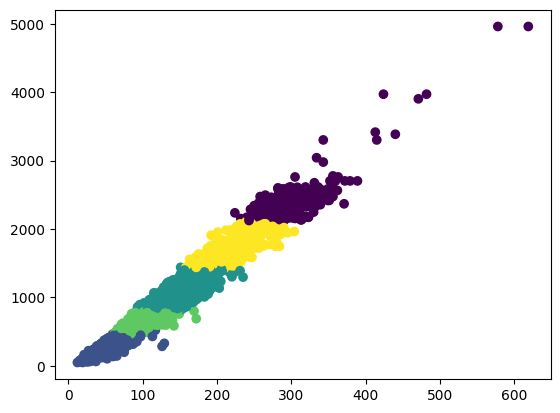

In [21]:
plt.scatter(newdf["AirTime"],newdf["Distance"],c = clstr.fit_predict(newdf))
plt.show()

In [22]:
newdf["Agrupacion"] = clstr.labels_
newdf.head()

,AirTime,Distance,TaxiOut,ArrDelay,DepDelay,Agrupacion
0,69.00,431,78.00,60.00,-3.00,1
1,246.00,1848,9.00,14.00,17.00,4
2,89.00,641,11.00,-8.00,0.00,3
3,219.00,1557,27.00,-2.00,-4.00,4
4,64.00,412,12.00,-9.00,-5.00,1


In [ ]:
newdf.groupby("Agrupacion").describe()

# Ejercicios Clustering

1. Ajusta un modelo de K-means y un modelo de clúster jerárquico para los datos "iris". ¿Qué cantidad de clusters te parece razonable en este caso?



2. Visualiza los datos de uno de los dos métodos de clúster, coloreando según su grupo

3. ¿Cuál de los dos algoritmos da resultados más equilibrados (tamaños de los grupos) con estos datos?

4. ¿Funciona mejor el modelo con los datos reescalados?

5. Compara los grupos que has generado con las especies, tienen sentido? Como lo representaríamos?

6. Explora algún algoritmo de clustering distinto a los que ya hemos visto, y aplicalo sobre iris o los datos de los vuelos

7. Usando un bucle, estudia cuánto tarda en ajustarse un Kmeans y una agrupación jerárquica para distintas cantidades de datos (100,1000,10000,100000, por ejemplo)

### Clustering II

1. Intenta agrupar los coches usando el algoritmo DBSCAN

2. Representa gráficamente los resultados, qué cantidad de grupos te parecen razonables?

3. Juega con el parámetro eps a ver qué diferencias se observan

4. Compara con los demás algoritmos de clústering que hemos visto!

5. Hay alguna correspondencia entre los grupos generados y la variable "origin"?

© Netmind S.L.

Todos los derechos reservados. Este documento (v1.00) ha sido diseñado para el uso exclusivo del cliente que atiende a esta formación.

Ninguna parte de este documento puede ser reproducida, distribuida o transmitida en cualquier forma o por cualquier medio sin el permiso previo por escrito de Netmind.